## Fetching Dataset

In [1]:
from sklearn.datasets import fetch_openml
import matplotlib
import matplotlib.pyplot as plt

In [2]:
mnist = fetch_openml('mnist_784')

## Getting data into Numpy Array

In [3]:
x , y =mnist['data'],mnist['target']

## Getting shape of X and Y array

In [4]:
x.shape

(70000, 784)

In [5]:
y.shape

(70000,)

## Plotting the pixels here 

In [6]:
%matplotlib inline

In [18]:
some_digit = x[3671]
some_digit_image = some_digit.reshape(28, 28) #reshaping and plotting

(-0.5, 27.5, 27.5, -0.5)

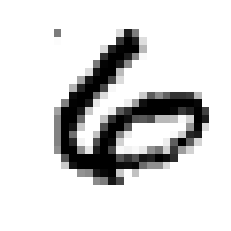

In [19]:
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation = 'nearest') #Plotting Image
plt.axis('off') #To off the axis

In [21]:
y[3671] # Watching Label

'6'

## Splitting training data

In [22]:
x_train, x_test = x[:6000], x[6000:7000]
y_train, y_test = y[:6000], y[6000:7000]

## Shuffling data


In [23]:
import numpy as np
shuffle_index = np.random.permutation(6000)
x_train, y_train = x_train[shuffle_index], y_train[shuffle_index]

## Creating '1' Detector

In [24]:
y_train = y_train.astype(np.int8) #Converting strings into Integers
y_test = y_test.astype(np.int8)

y_train_1 = (y_train==1)
y_test_1 = (y_test==1)

## Putting Classifier

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
clf = LogisticRegression(tol = 0.1)

In [27]:
clf.fit(x_train, y_train_1)

c:\users\lenovo\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(tol=0.1)

In [28]:
clf.predict([some_digit])

array([False])

In [29]:
from sklearn.model_selection import cross_val_score
accuracy_lev = cross_val_score(clf, x_train, y_train_1, cv = 3,scoring = 'accuracy')

In [30]:
print(accuracy_lev.mean()*100)

98.35
